In [26]:
import numpy as np
import matplotlib.pyplot as plt
import keras.utils as image

In [2]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from bing_image_downloader import downloader
downloader.download('Pessoas sorrindo', limit=4,  output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

[%] Downloading Images to /content/dataset/Pessoas sorrindo


[!!]Indexing page: 1

[%] Indexed 4 Images on Page 1.


[%] Downloading Image #1 from http://www.powerthoughtsmeditationclub.com/wp-content/uploads/2015/05/shutterstock_1158737741.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/c6/ec/fb/c6ecfbbd62c15f16a638d3cefeac9446.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://piximus.net/media/1663/smiling-people-6.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://comps.canstockphoto.com.br/pessoas-sorridentes-banco-de-imagens_csp6094055.jpg
[%] File Downloaded !



[%] Done. Downloaded 4 images.


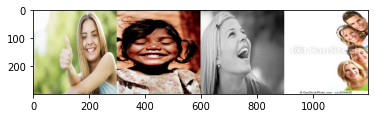

In [86]:
im = [image.load_img(f'dataset/Pessoas sorrindo/Image_{i}.jpg', target_size=(299, 299)) for i in range(1, 5)] # Primeira redução foi nas dimensões das imagens, um resize

concat_im = np.concatenate(im, axis=1)

plt.imshow(concat_im) # Imagens baixadas

In [87]:
def GrayScale(img):
  img = np.asarray(img)
  r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
  img_cinza = 0.299 * r + 0.587 * g + 0.114 * b
  return img_cinza

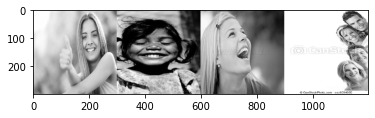

In [88]:
im = [GrayScale(img) for img in im] # Imagens em tons de cinza eliminam os canais RGB, diminuindo o número de matrizes de 3 para 1

concat_im = np.concatenate(im, axis=1)

plt.imshow(concat_im, cmap='gray')

In [91]:
def BinaryImage(img):
  img = np.asarray(img)
  binary = np.where(img > 160, 255, 0)
  return binary

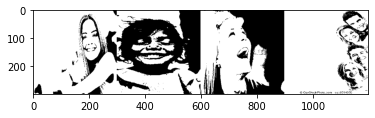

In [92]:
im = [BinaryImage(img) for img in im] # Binarizando imagens, ajuda no processamento dos dados e reconhecimento de padrões

concat_im = np.concatenate(im, axis=1)

plt.imshow(concat_im, cmap='gray')